In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import itertools
import pylab as pl

from sklearn.cluster import KMeans
from sklearn import metrics
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer 
from sklearn.naive_bayes import GaussianNB
import datetime
import plotly.express as px

In [ ]:
#Defining an "adopted user" as a user who has logged into the product on three separate
#days in at least one sevenday period, identify which factors predict future user
#adoption

#my answer: the factors that i would use to predict future user adoption is the creation source relative to the users
#with the most activity
#Also, i would look into organizations that users are from that have the highest usage over the longest period of time

In [26]:
users = pd.read_csv("takehome_users.csv",encoding = 'latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [27]:
users.head().T

,0,1,2,3,4
object_id,1,2,3,4,5
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52,2013-05-21 08:09:28,2013-01-17 10:14:20
name,Clausen August,Poole Matthew,Bottrill Mitchell,Clausen Nicklas,Raw Grace
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com,NicklasSClausen@yahoo.com,GraceRaw@yahoo.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE,GUEST_INVITE,GUEST_INVITE
last_session_creation_time,1398138810.0,1396237504.0,1363734892.0,1369210168.0,1358849660.0
opted_in_to_mailing_list,1,0,0,0,0
enabled_for_marketing_drip,0,0,0,0,0
org_id,11,1,94,1,193
invited_by_user_id,10803.0,316.0,1525.0,5151.0,5240.0


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [29]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [30]:
#user_engagement
user_engage = pd.read_csv("takehome_user_engagement.csv",encoding = 'latin-1')
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [31]:
user_engage.head().T

,0,1,2,3,4
time_stamp,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-11-29 03:45:04,2013-12-09 03:45:04,2013-12-25 03:45:04
user_id,1,2,2,2,2
visited,1,1,1,1,1


In [32]:
user_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [33]:
user_engage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [41]:
user_engage['visited'].T

0         1
1         1
2         1
3         1
4         1
         ..
207912    1
207913    1
207914    1
207915    1
207916    1
Name: visited, Length: 207917, dtype: int64

In [46]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [34]:
correlations = pd.concat([user_engage, users], axis=1).corr()
print(correlations)

                             user_id  visited  object_id  \
user_id                     1.000000      NaN   0.995828   
visited                          NaN      NaN        NaN   
object_id                   0.995828      NaN   1.000000   
last_session_creation_time  0.016186      NaN   0.015238   
opted_in_to_mailing_list   -0.032978      NaN  -0.032370   
enabled_for_marketing_drip -0.022738      NaN  -0.022040   
org_id                      0.004911      NaN   0.004110   
invited_by_user_id          0.017516      NaN   0.018699   

                            last_session_creation_time  \
user_id                                       0.016186   
visited                                            NaN   
object_id                                     0.015238   
last_session_creation_time                    1.000000   
opted_in_to_mailing_list                      0.006590   
enabled_for_marketing_drip                    0.008035   
org_id                                        0.04220

C:\Users\Mtize\AppData\Local\Temp\ipykernel_26948\1798673679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = pd.concat([user_engage, users], axis=1).corr()


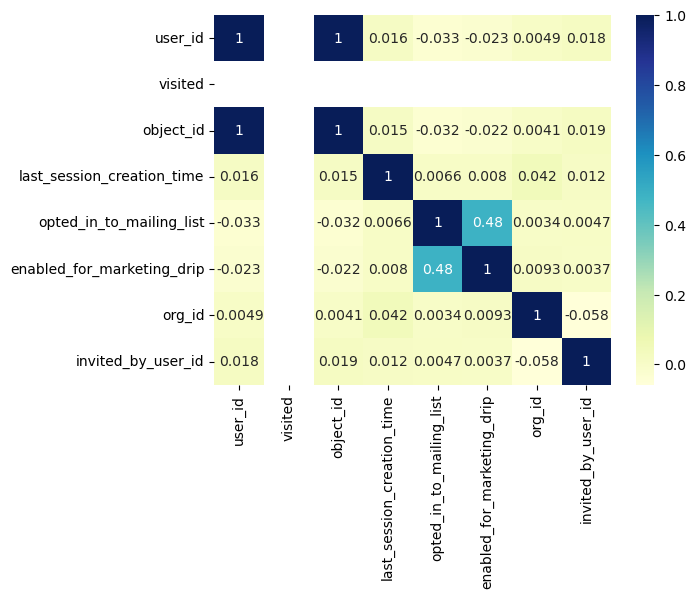

In [35]:
hm = sns.heatmap(correlations, cmap="YlGnBu", annot=True) 

<Axes: xlabel='org_id', ylabel='last_session_creation_time'>

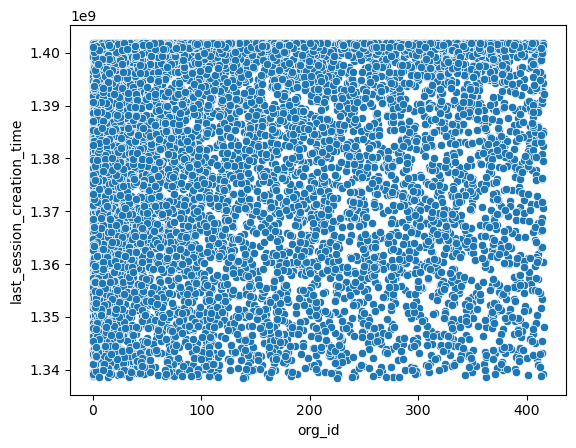

In [45]:
sns.scatterplot(data=users, x="org_id", y="last_session_creation_time")

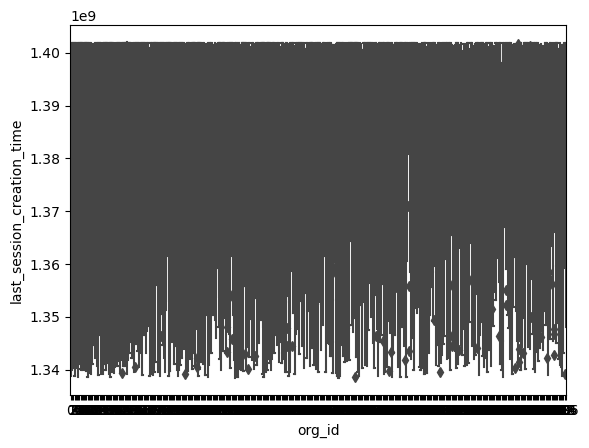

In [47]:
sns.boxplot(x="org_id", y="last_session_creation_time", data=users)

# Show the plot
plt.show()

C:\Users\Mtize\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Mtize\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Mtize\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='org_id', ylabel='last_session_creation_time'>

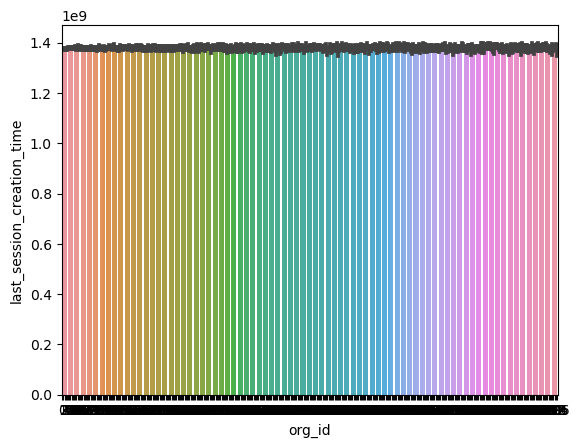

In [49]:
sns.barplot(data = users, x="org_id", y="last_session_creation_time")

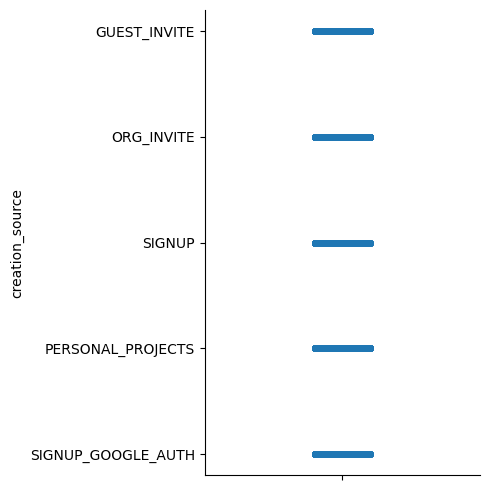

In [65]:
sns.catplot(data=users["creation_source"])

In [67]:
creation_count = users['creation_source']
creation_count.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

<Axes: xlabel='last_session_creation_time', ylabel='Count'>

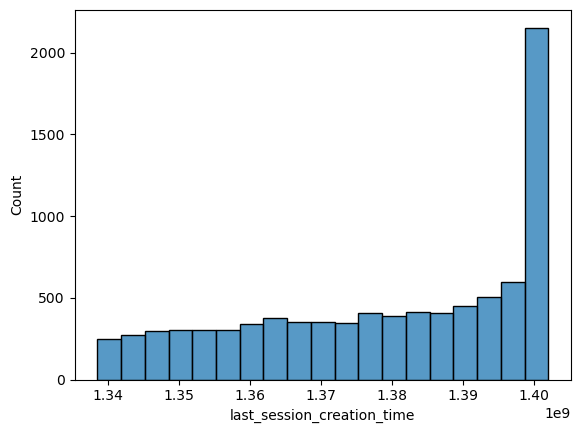

In [50]:
sns.histplot(data=users, x="last_session_creation_time")

<Axes: xlabel='org_id', ylabel='Count'>

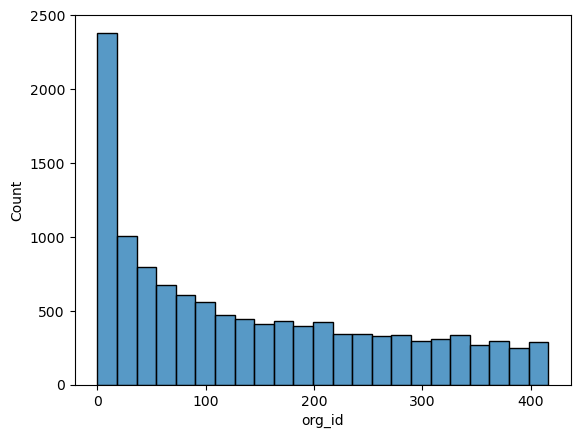

In [51]:
sns.histplot(data=users, x="org_id")

C:\Users\Mtize\AppData\Local\Temp\ipykernel_26948\1184497411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users['last_session_creation_time'], hist=False)


<Axes: xlabel='last_session_creation_time', ylabel='Density'>

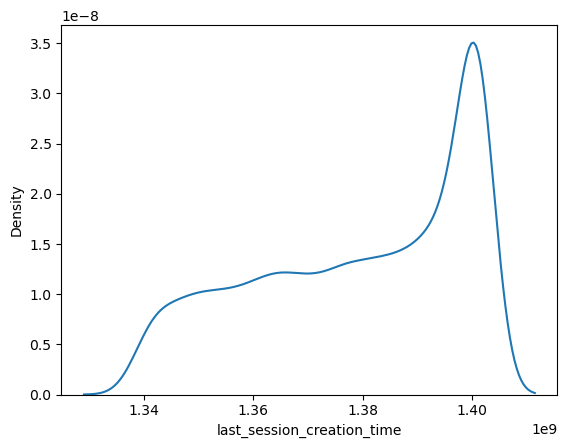

In [53]:
sns.distplot(users['last_session_creation_time'], hist=False)

C:\Users\Mtize\AppData\Local\Temp\ipykernel_26948\1758539227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users['org_id'], hist=False)


<Axes: xlabel='org_id', ylabel='Density'>

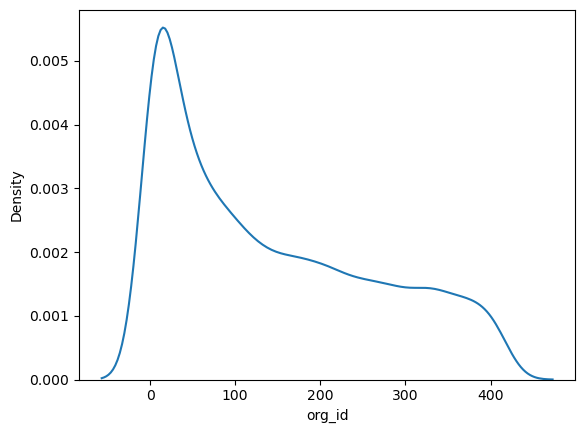

In [52]:
sns.distplot(users['org_id'], hist=False)